# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

## Work

### Read in data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('BinSize_d400.csv')
station_locations_by_hash = df[df['hash'] == 'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89']
lons = station_locations_by_hash['LONGITUDE'].tolist()
lats = station_locations_by_hash['LATITUDE'].tolist()
plt.figure(figsize=(10,10))
plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

In [2]:
df = pd.read_csv('weather_data.csv')

In [3]:
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [4]:
x = pd.Series([1,2,3])
x.apply(lambda a: a**2)

0    1
1    4
2    9
dtype: int64

In [5]:
df['Year'], df['Month-Date'] = zip(*df['Date'].apply(lambda x: (x[:4], x[5:])))
df = df[df['Month-Date'] != '02-29']
df.head()
df.sort_values(by=['Year','Month-Date']).head()

,ID,Date,Element,Data_Value,Year,Month-Date
1860,USC00202308,2005-01-01,TMAX,150,2005,01-01
1906,USC00205822,2005-01-01,TMIN,-17,2005,01-01
2035,USC00202308,2005-01-01,TMIN,-17,2005,01-01
2073,USC00203712,2005-01-01,TMAX,144,2005,01-01
2812,USC00203712,2005-01-01,TMIN,-50,2005,01-01


In [6]:
max_ally = df[(df['Year'] != '2015')].groupby(['Month-Date']).max().loc[:,['Data_Value']]
min_ally = df[(df['Year'] != '2015')].groupby(['Month-Date']).min().loc[:,['Data_Value']]

max_15 = df[(df['Year'] == '2015')].groupby(['Month-Date']).max().loc[:,['Data_Value']]
min_15 = df[(df['Year'] == '2015')].groupby(['Month-Date']).min().loc[:,['Data_Value']]

#record_max = [max(value) for value in zip(max_15['Data_Value'], max_ally['Data_Value'])]
#record_min = [min(value) for value in zip(min_15['Data_Value'], min_ally['Data_Value'])]

#print( str(len(max_ally)) + '   ' + str(len(max_15)))



In [7]:
temp_max = df[(df['Element'] == 'TMAX') & (df['Year'] != '2015')].groupby('Month-Date').aggregate({'Data_Value':np.max})
temp_min = df[(df['Element'] == 'TMIN') & (df['Year'] != '2015')].groupby('Month-Date').aggregate({'Data_Value':np.min})

temp_max_15 = df[(df['Element'] == 'TMAX') & (df['Year'] == '2015')].groupby('Month-Date').aggregate({'Data_Value':np.max})
temp_min_15 = df[(df['Element'] == 'TMIN') & (df['Year'] == '2015')].groupby('Month-Date').aggregate({'Data_Value':np.min})

broken_max = np.where(temp_max_15['Data_Value'] > temp_max['Data_Value'])[0]
broken_min = np.where(temp_min_15['Data_Value'] < temp_min['Data_Value'])[0]

## My method to compare 2015 max and all year max

In [35]:
max_list = (max_15['Data_Value'] > max_ally['Data_Value'])
min_list = (min_15['Data_Value'] < min_ally['Data_Value'])

record_max = np.array([x for x, y in zip(tuple(max_15['Data_Value']), tuple(max_list)) if y ==True])
record_min = np.array([x for x, y in zip(tuple(min_15['Data_Value']), tuple(min_list)) if y ==True])

print(record_max)
print(record_min)

[ 83 278 306 333 306 317 339 361 328 350 339 311 317 300 294 283 272 228
 261 261 256 239 200 100 100 122 150 156 200 194 183 161 150 183 172 111
 117]
[-155 -200 -238 -239 -260 -294 -272 -260 -343 -322 -267 -272 -217 -216
 -288 -272 -221 -255 -222 -122 -111 -122  -71  -50    0   72   56  -55
  -55  -61  -39  -44]


## The "correct" answer 

In [39]:
record_max = np.where(max_15['Data_Value'] > max_ally['Data_Value'])[0]
record_min = np.where(min_15['Data_Value'] < min_ally['Data_Value'])[0]
print(record_min)
print(record_max)

[  4  10  33  44  45  46  47  49  50  51  53  54  55  56  57  58  63  64
  65  86  87  88 113 114 139 183 239 289 290 291 292 313]
[ 39 106 126 127 130 137 207 209 230 249 250 258 259 260 270 271 292 305
 306 307 308 309 321 340 341 342 343 344 345 346 347 348 349 356 357 358
 359]


## To compare manually

In [10]:
#print(max_15)
pd.merge(max_15, max_ally, on = "Month-Date")

,Data_Value_x,Data_Value_y
Month-Date,,
01-01,11,156
01-02,39,139
01-03,39,133
01-04,44,106
01-05,28,128
01-06,33,189
01-07,-67,217
01-08,-82,194
01-09,-66,178


In [52]:
max_ally.iloc[record_max]

,Data_Value
Month-Date,
02-09,78
04-17,244
05-07,256
05-08,317
05-11,294
05-18,289
07-27,333
07-29,339
08-19,322


## Start plotting

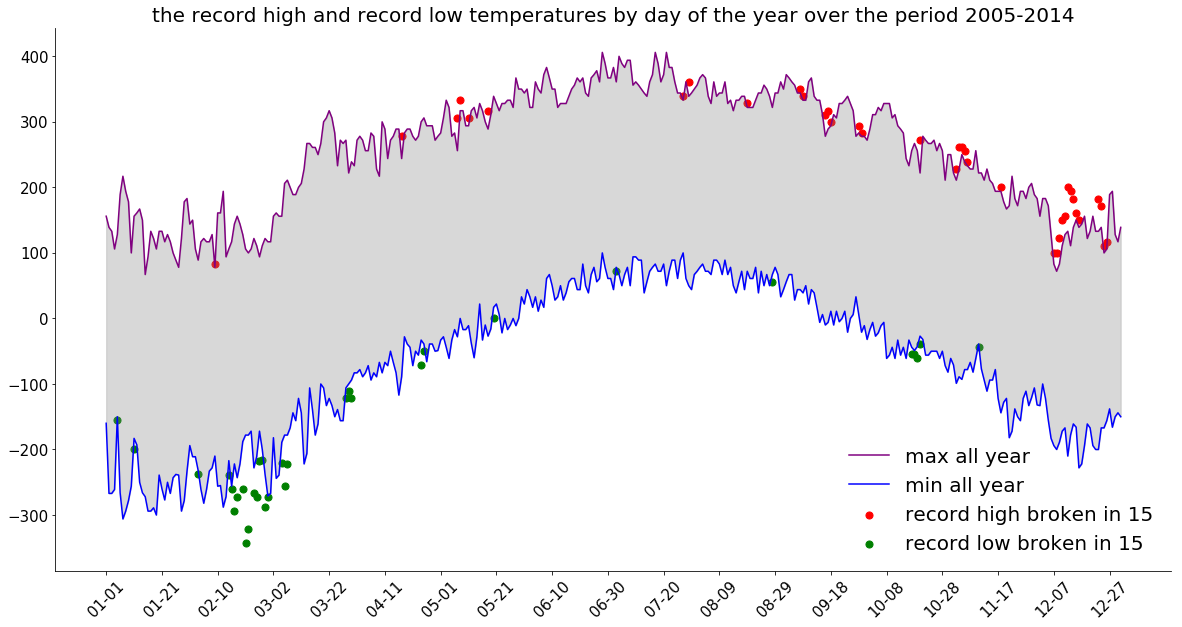

In [90]:
plt.figure(figsize=(20,10))

plt.plot(range(len(max_ally)), max_ally, label='max all year', color="purple")
plt.plot(range(len(min_ally)), min_ally, label='min all year', color='blue')

plt.scatter(record_max, max_15.iloc[record_max], s=50, c="red", label="record high broken in 15")
plt.scatter(record_min, min_15.iloc[record_min], s=50, c="green", label="record low broken in 15")

plt.xticks(range(0, len(max_ally), 20), max_ally.index.values[range(0, len(max_ally), 20)], size=15, rotation=45)
plt.yticks(range(-300, 500, 100), size=15)

plt.fill_between(range(len(max_ally)), max_ally['Data_Value'], min_ally['Data_Value'], color="grey", alpha=0.3)

plt.legend(loc=4, frameon=False, title='', fontsize=20)
plt.title('the record high and record low temperatures by day of the year over the period 2005-2014', size=20, loc='center')

#remove single frame (up/left/bottom/right)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#remove plot frame
#for spine in plt.gca().spines.values():
#    spine.set_visible(False)

#remove ticks
#plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')





# Answer

[ 39 106 126 127 130 137 207 209 230 249 250 258 259 260 270 271 292 305
 306 307 308 309 321 340 341 342 343 344 345 346 347 348 349 356 357 358
 359]
[  4  10  33  44  45  46  47  49  50  51  53  54  55  56  57  58  63  64
  65  86  87  88 113 114 139 183 239 289 290 291 292 313]


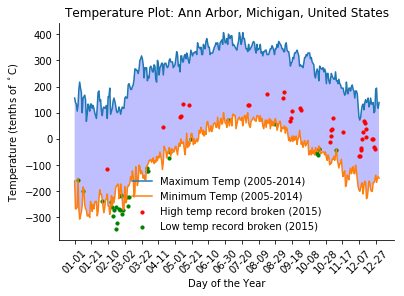

In [42]:
import numpy as np

temp_max = df[(df['Element'] == 'TMAX') & (df['Year'] != '2015')].groupby('Month-Date').aggregate({'Data_Value':np.max})
temp_min = df[(df['Element'] == 'TMIN') & (df['Year'] != '2015')].groupby('Month-Date').aggregate({'Data_Value':np.min})

temp_max_15 = df[(df['Element'] == 'TMAX') & (df['Year'] == '2015')].groupby('Month-Date').aggregate({'Data_Value':np.max})
temp_min_15 = df[(df['Element'] == 'TMIN') & (df['Year'] == '2015')].groupby('Month-Date').aggregate({'Data_Value':np.min})

broken_max = np.where(temp_max_15['Data_Value'] > temp_max['Data_Value'])[0]
broken_min = np.where(temp_min_15['Data_Value'] < temp_min['Data_Value'])[0]

print(broken_max)
print(broken_min)

plt.figure()

plt.plot(temp_max.values, label='Maximum Temp (2005-2014)')
plt.plot(temp_min.values, label='Minimum Temp (2005-2014)')

plt.gca().fill_between(range(len(temp_min)), temp_min['Data_Value'],temp_max['Data_Value'], facecolor='blue', alpha=0.25)

plt.xticks(range(0, len(temp_min), 20), temp_min.index[range(0, len(temp_min), 20)], rotation = '45')

plt.scatter(broken_max, temp_min_15.iloc[broken_max], s=10, color='red', label='High temp record broken (2015)')
plt.scatter(broken_min, temp_min_15.iloc[broken_min], s=10, color='green', label='Low temp record broken (2015)')

plt.legend(frameon = False)

plt.xlabel('Day of the Year')
plt.ylabel('Temperature (tenths of $^\circ$C)')
plt.title('Temperature Plot: Ann Arbor, Michigan, United States')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()